In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income')

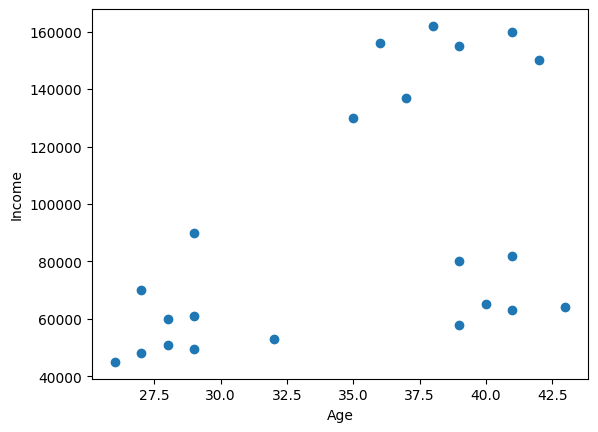

In [20]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [21]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [22]:
df['cluster'] = y_pred
df

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


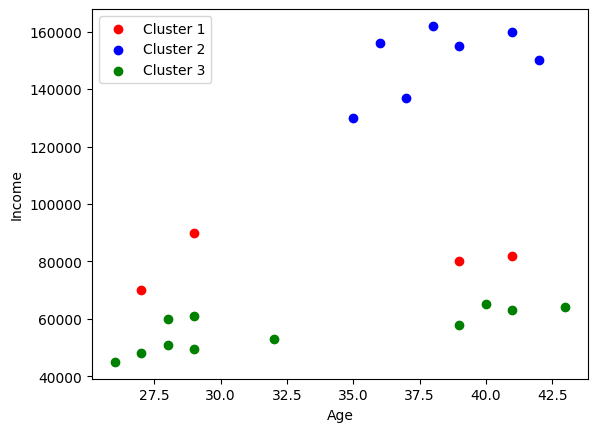

In [23]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]    
df3 = df[df['cluster'] == 2]
plt.scatter(df1['Age'], df1['Income($)'], color='red', label='Cluster 1')
plt.scatter(df2['Age'], df2['Income($)'], color='blue', label='Cluster 2')
plt.scatter(df3['Age'], df3['Income($)'], color='green', label='Cluster 3')
plt.xlabel('Age')   
plt.ylabel('Income')
plt.legend()

In [24]:
scalar = MinMaxScaler()
df[['Age', 'Income($)']] = scalar.fit_transform(df[['Age', 'Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


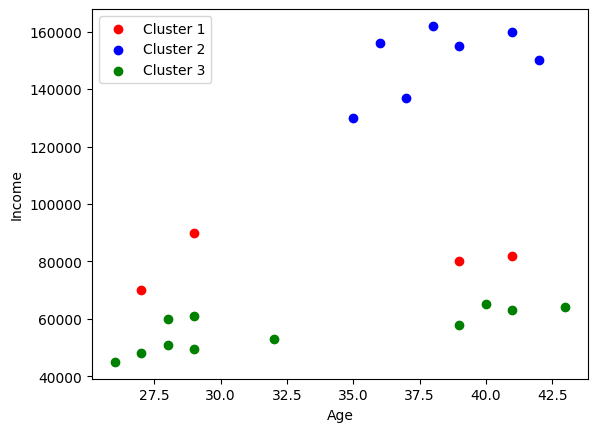

In [30]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred
df['cluster'] = y_pred
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

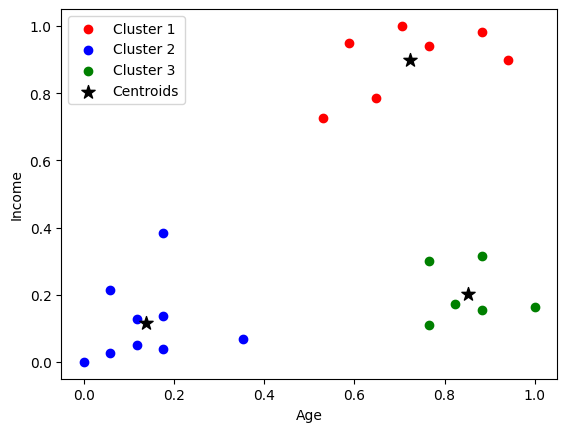

In [36]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]    
df3 = df[df['cluster'] == 2]
plt.scatter(df1['Age'], df1['Income($)'], color='red', label='Cluster 1')
plt.scatter(df2['Age'], df2['Income($)'], color='blue', label='Cluster 2')
plt.scatter(df3['Age'], df3['Income($)'], color='green', label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', s=100, label='Centroids')
plt.xlabel('Age')   
plt.ylabel('Income')
plt.legend()

In [40]:
k_range = range(1, 11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [41]:
sse

[5.434011511988179,
 2.3456144914725936,
 0.4750783498553096,
 0.34910470944195654,
 0.27612937677853544,
 0.2531513041376113,
 0.20969559207533517,
 0.17099501475056006,
 0.11612804668175383,
 0.08701976211883644]

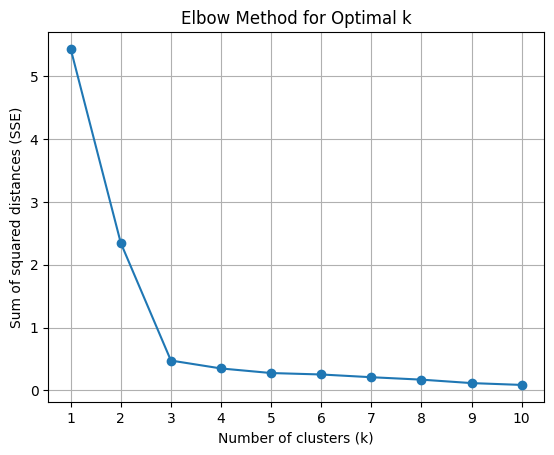

In [44]:
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')    
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid()
plt.show()

In [45]:
import joblib
joblib.dump(km, 'kmeans_model.joblib')

['kmeans_model.joblib']